In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [14]:
df = pd.read_csv('Dry_Bean_Datasetcsv.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [15]:
df1 = df[df['Class']=='SIRA'].head(500)
df2 = df[df['Class']=='BOMBAY'].head(500)
df3 = df[df['Class']=='HOROZ'].head(500)
df4 = df[df['Class']=='SEKER'].head(500)
df5 = df[df['Class']=='CALI'].head(500)
df6 = df[df['Class']=='DERMASON'].head(500)
df7 = df[df['Class']=='BARBUNYA'].head(500)
df_list = [df1, df2, df3, df4, df5, df6, df7]
df_all = pd.concat(df_list, ignore_index=True)

In [3]:
prediction_list = df['Class'].unique().tolist()
print(prediction_list)

['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']


In [4]:
df.shape

(13611, 17)

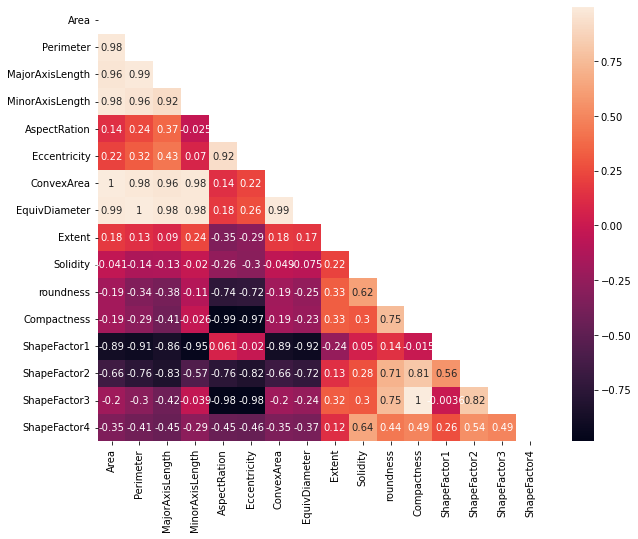

In [16]:
num = df_all
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix) 
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [6]:
def log_transform_clean(x):
    if x>0:
        return np.log(x)
    else:
        return 0

In [17]:
for name in df.columns:
    if name != "Class":
        if df_all[name].min() > 0:

            df_all[name+"_sqrt"] = df_all[name]**(1/2)
            df_all[name+"_log"] = list(map(log_transform_clean, df_all[name]))
            box_cox, lmbda = stats.boxcox(df_all[name])
            df_all[name+"_bc"]= box_cox

#             fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,15)) 
#             plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
#             sns.histplot(df[name], ax=ax1)
#             sns.histplot(df[name+"_sqrt"], ax=ax2)
#             sns.histplot(df[name+"_log"], ax=ax3)
#             sns.histplot(df[name+"_bc"], ax=ax4)
        else:
#             fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,5)) 
            df_all[name+"_sqrt"] = df_all[name]**(1/2)
            df_all[name+"_log"] = list(map(log_transform_clean, df_all[name]))
#             sns.histplot(df[name], ax=ax1)
#             sns.histplot(df[name+"_sqrt"], ax=ax2)
#             sns.histplot(df[name+"_log"], ax=ax3)
    else: continue

df_all.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor1_bc,ShapeFactor2_sqrt,ShapeFactor2_log,ShapeFactor2_bc,ShapeFactor3_sqrt,ShapeFactor3_log,ShapeFactor3_bc,ShapeFactor4_sqrt,ShapeFactor4_log,ShapeFactor4_bc
0,31519,676.641,255.073562,157.802740,1.616408,0.785662,32065,200.327824,0.758033,0.982972,...,-0.601985,0.043580,-6.266310,-5.731731,0.785373,-0.483194,-0.485268,0.998507,-0.002987,-0.002430
1,31751,671.914,244.102719,168.522491,1.448487,0.723451,32462,201.063743,0.694284,0.978097,...,-0.602002,0.046722,-6.127088,-5.615333,0.823685,-0.387934,-0.389270,0.991331,-0.017414,-0.006405
2,32857,668.106,233.804968,179.500919,1.302528,0.640764,33185,204.535649,0.775569,0.990116,...,-0.602024,0.050703,-5.963542,-5.478000,0.874813,-0.267490,-0.268125,0.998410,-0.003183,-0.002556
3,33180,670.488,240.969501,175.645040,1.371912,0.684610,33564,205.538532,0.774835,0.988559,...,-0.602018,0.048696,-6.044309,-5.545903,0.852965,-0.318074,-0.318971,0.999066,-0.001868,-0.001639
4,33206,680.423,260.089827,163.102720,1.594638,0.778938,33583,205.619047,0.752663,0.988774,...,-0.601996,0.043443,-6.272595,-5.736975,0.790569,-0.470004,-0.471966,0.998323,-0.003357,-0.002665


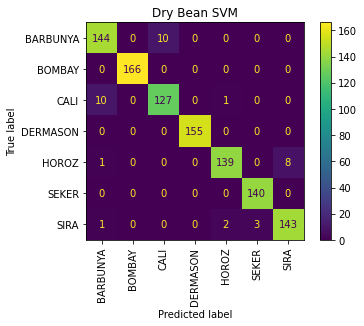

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import numpy as np
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y = df_all[['Class']]
X = df_all.drop("Class",axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

svmClf = svm.SVC(kernel='linear',gamma='auto', C=1, random_state = 0)
svmClf.fit(x_train,np.ravel(y_train))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(svmClf, x_test, y_test)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean SVM')
plt.show()  

In [20]:
predictedSVM = svmClf.predict(x_test)
reportSVM = classification_report(y_test, predictedSVM, output_dict=True)
reportdfSVM = pd.DataFrame(reportSVM).transpose()
reportdfSVM

,precision,recall,f1-score,support
BARBUNYA,0.923077,0.935065,0.929032,154.000000
BOMBAY,1.000000,1.000000,1.000000,166.000000
CALI,0.927007,0.920290,0.923636,138.000000
DERMASON,1.000000,1.000000,1.000000,155.000000
HOROZ,0.978873,0.939189,0.958621,148.000000
SEKER,0.979021,1.000000,0.989399,140.000000
SIRA,0.947020,0.959732,0.953333,149.000000
accuracy,0.965714,0.965714,0.965714,0.965714
macro avg,0.965000,0.964897,0.964860,1050.000000
weighted avg,0.965831,0.965714,0.965687,1050.000000


In [8]:
df.columns.to_list()

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4',
 'Class',
 'Area_sqrt',
 'Area_log',
 'Area_bc',
 'Perimeter_sqrt',
 'Perimeter_log',
 'Perimeter_bc',
 'MajorAxisLength_sqrt',
 'MajorAxisLength_log',
 'MajorAxisLength_bc',
 'MinorAxisLength_sqrt',
 'MinorAxisLength_log',
 'MinorAxisLength_bc',
 'AspectRation_sqrt',
 'AspectRation_log',
 'AspectRation_bc',
 'Eccentricity_sqrt',
 'Eccentricity_log',
 'Eccentricity_bc',
 'ConvexArea_sqrt',
 'ConvexArea_log',
 'ConvexArea_bc',
 'EquivDiameter_sqrt',
 'EquivDiameter_log',
 'EquivDiameter_bc',
 'Extent_sqrt',
 'Extent_log',
 'Extent_bc',
 'Solidity_sqrt',
 'Solidity_log',
 'Solidity_bc',
 'roundness_sqrt',
 'roundness_log',
 'roundness_bc',
 'Compactness_sqrt',
 'Compactness_log',
 'Compactness_bc',
 'ShapeFactor1_sqrt',
 'ShapeFactor1_log',

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score, accuracy_score, roc_auc_score, f1_score
from sklearn.decomposition import PCA


ModuleNotFoundError: No module named 'sklearn_extra'

In [ ]:
def model_predictions(x, X_train, X_test, y_train, y_test):
    if x == "logistic":
        model = LogisticRegression(random_state=0, multi_class='ovr', solver='liblinear')
        model.fit(X_train, y_train)
        print("Logistic:")
        predictions =  model.predict(X_test)
    elif x == "knn":
        model = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
        model.fit(X_train, y_train)
        print("KNN:")
        predictions = model.predict(X_test)
    elif x == "kmeans":
        model = KMeans(n_clusters=7, init="k-means++", n_init=500, max_iter=500)
        model.fit(X_train)
        print("Kmeans:")
        predictions = model.predict(X_test)
    elif x == "kmmedoids":
        model = KMedoids(n_clusters=7, method='pam', init="build", max_iter=500)
        model.fit(X_train)
        print("Kmmedoids:")
        predictions = model.predict(X_test)   
    elif x=="decision_tree":
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        print("Decision Tree:")
        predictions = model.predict(X_test)
    elif x=="random_forest":
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        print ("Random Forest:")
        predictions = model.predict(X_test)
    else:
        print ("Input should be logistic, knn, decision_tree or random_forest")   
    
    #calculate scores. Kappa/ROC-AUC/F1 were chosen and should be as high as possible 0-1
    print("The accuracy of the model on test set is: ", accuracy_score(y_test, predictions)) 
    print("Kappa: ", cohen_kappa_score(y_test, predictions))   
    #print("ROC-AUC score: ", roc_auc_score(y_test, predictions, multi_class="ovr")) 
    print("F1 score: ", f1_score(y_test, predictions, average="weighted"))  
    #generate confusion matrices with raw and normalised values
    print ("Confusion Matrix - raw:")
    plot_confusion_matrix(model, X_test, y_test, cmap = "YlOrBr")
    plt.savefig('confusion_raw.png')
    plt.show() 
    
    print ("Confusion Matrix - normalised row-wise:")
    plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = "GnBu", values_format='.2f')
    plt.show() 
    return [model, predictions]

In [ ]:
# X=df.drop(["Class"],axis=1)
y=df["Class"]

In [ ]:
mapping = {
        'SEKER': 0,
        'BARBUNYA': 1,
        'BOMBAY' : 2,
        'CALI' : 3,
        'HOROZ' : 4,
        'SIRA' : 5,
        'DERMASON' : 6
    }
y = y.replace(mapping)

In [ ]:
y.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42, shuffle =True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

transformer = StandardScaler().fit(X_train)
X_train_standardized = transformer.transform(X_train)
X_test_standardized = transformer.transform(X_test)

transformer2=Normalizer().fit(X_train)
X_train_normalized = transformer2.transform(X_train)
X_test_normalized = transformer2.transform(X_test)

In [ ]:
#apply standardisation to train data
X_train_standardized = pd.DataFrame(X_train_standardized, index=X_train.index)
X_train_standardized.columns = X_train.columns

X_test_standardized = pd.DataFrame(X_test_standardized, index=X_test.index)
X_test_standardized.columns = X_test.columns

In [ ]:
#apply normalisation to train data
X_train_normalized = pd.DataFrame(X_train_normalized, index=X_train.index)
X_train_normalized.columns = X_train.columns

X_test_normalized = pd.DataFrame(X_test_normalized, index=X_test.index)
X_test_normalized.columns = X_test.columns

In [ ]:
#choose whether to use standardized or normalized data
X_train = X_train_standardized
X_test = X_test_standardized

In [ ]:
# #choose a model to run (logistic, knn, decision tree, random forest)
knn_model = model_predictions("kmeans", X_train, X_test, y_train, y_test)

In [10]:
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy as np
import elice_utils
import csv

def main():
    X, attributes = input_data()
    #print(X)
    #print(X.shape)
    pca_array = normalize(X)
    #print(X)
    pca, pca_array = run_PCA(X, 2)
    visualize_2d_wine(pca_array)

def input_data():
    X = []
    attributes = []
    with open('') as fp:
        attributes = fp.readlines()
    attributes = [x for x in attributes]
    #print(attributes)
    
    csvreader = csv.reader(open('Dry_Bean_Datasetcsv.csv'))
    for line in csvreader:
        float_numbers = [float(x) for x in line]
        X.append(float_numbers)
        #print(line)

    return np.array(X), attributes

def run_PCA(X, num_components):
    pca  = sklearn.decomposition.PCA(n_components=num_components)
    pca.fit(X)
    pca_array = pca.transform(X)
    
    #print(pca_array)
    
    return pca, pca_array
    
def normalize(X):
    '''
    각각의 feature에 대해,
    178개의 데이터에 나타나는 해당하는 feature의 값이 최소 0, 최대 1이 되도록
    선형적으로 데이터를 이동시킵니다.
    '''
    for i in range(X.shape[1]):
        X[:,i] = X[:,i] - np.min(X[:,i])
        X[:,i] = X[:,i] / np.max(X[:,i])

    return X

def visualize_2d_wine(X):
    '''X를 시각화하는 코드를 구현합니다.'''
    plt.scatter(X[:,0],X[:,1])
    plt.savefig("image.png")
    elice_utils.send_image("image.png")

if __name__ == '__main__':
    main()

ModuleNotFoundError: No module named 'elice_utils'

In [11]:
pca  = PCA(n_components=2)
pca.fit(X)
pca_array = pca.transform(X)

NameError: name 'PCA' is not defined

In [12]:
X= pca_array

NameError: name 'pca_array' is not defined